In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('Team-3.csv')
X = data['Study Hours (per week)']
Y = data['Marks (out of 100)']

# Calculate sums
n = len(X)
sum_X = X.sum()
sum_Y = Y.sum()
sum_XY = (X * Y).sum()
sum_X2 = (X ** 2).sum()
sum_Y2 = (Y ** 2).sum()

In [2]:
# Calculate slope (b) and intercept (a) for Y on X
b = (n * sum_XY - sum_X * sum_Y) / (n * sum_X2 - sum_X ** 2)
a = (sum_Y - b * sum_X) / n

print(f"Regression line for Marks on Study Hours: Marks = {a:.1f} + {b:.1f} * Hours")

Regression line for Marks on Study Hours: Marks = 78.7 + -0.1 * Hours


In [3]:
# Calculate slope (d) and intercept (c) for X on Y
d = (n * sum_XY - sum_X * sum_Y) / (n * sum_Y2 - sum_Y ** 2)
c = (sum_X - d * sum_Y) / n

print(f"Regression line for Study Hours on Marks: Hours = {c:.1f} + {d:.1f} * Marks")

Regression line for Study Hours on Marks: Hours = 14.3 + -0.0 * Marks


In [7]:
print(data.columns)  # Should show: ['Study Hours (per week)', 'Marks (out of 100)']

Index(['Sl.no', 'Name', 'Age', 'Gender', 'Class', 'Study Hours (per week)',
       'Marks (out of 100)', 'Attendance (%)'],
      dtype='object')


In [10]:
# Check for NaN values
print("Missing values:\n", data[['Study Hours (per week)', 'Marks (out of 100)']].isnull().sum())

# Check correlation
corr, p_value = stats.pearsonr(data['Study Hours (per week)'], data['Marks (out of 100)'])
print(f"\nCorrelation: {corr:.3f} (p-value: {p_value:.3f})")

Missing values:
 Study Hours (per week)    0
Marks (out of 100)        0
dtype: int64


NameError: name 'stats' is not defined

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 2.3 MB/s eta 0:00:0000:0100:01m
Columns in dataset:
['Sl.no', 'Name', 'Age', 'Gender', 'Class', 'Study Hours (per week)', 'Marks (out of 100)', 'Attendance (%)']

Cleaned columns:
['Sl.no', 'Name', 'Age', 'Gender', 'Class', 'Study Hours (per week)', 'Marks (out of 100)', 'Attendance (%)']

Missing values:
Study Hours (per week)    0
Marks (out of 100)        0
dtype: int64

Basic statistics:
       Study Hours (per week)  Marks (out of 100)
count              979.000000          979.000000
mean                13.566905           77.379980
std                  3.015022            9.864866
min                  5.000000           47.000000
25%                 12.000000           70.000000
50%                 13.000000           78.000000
75%                 16.000000           84.000000
max                 23.000000          100.000000

Correlation between Study Hours and Marks: -0.029
P-value: 0.363


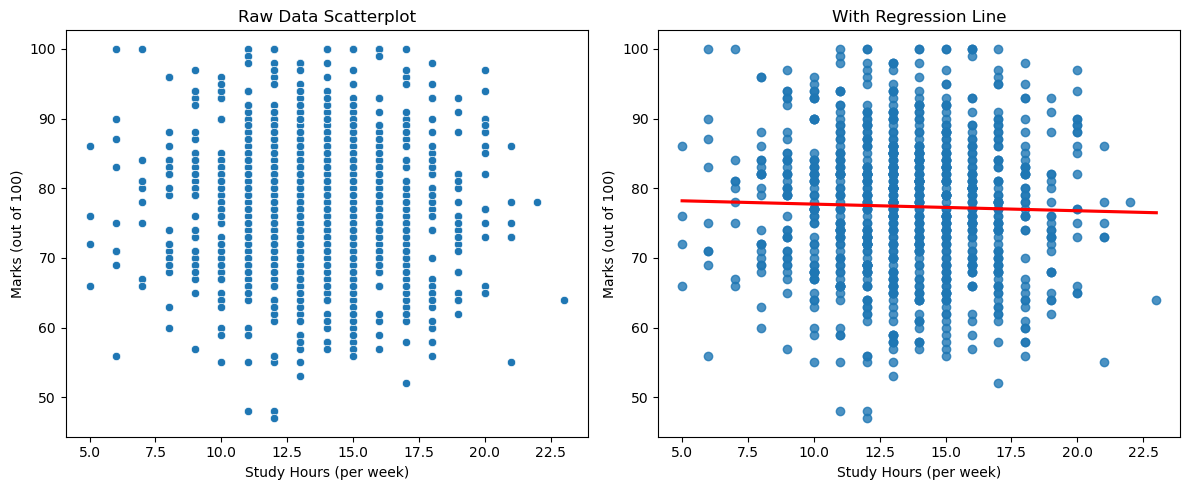


Regression Results:
a. Marks = 78.7 + -0.095*Hours (R² = 0.001)
b. Hours = 14.3 + -0.009*Marks


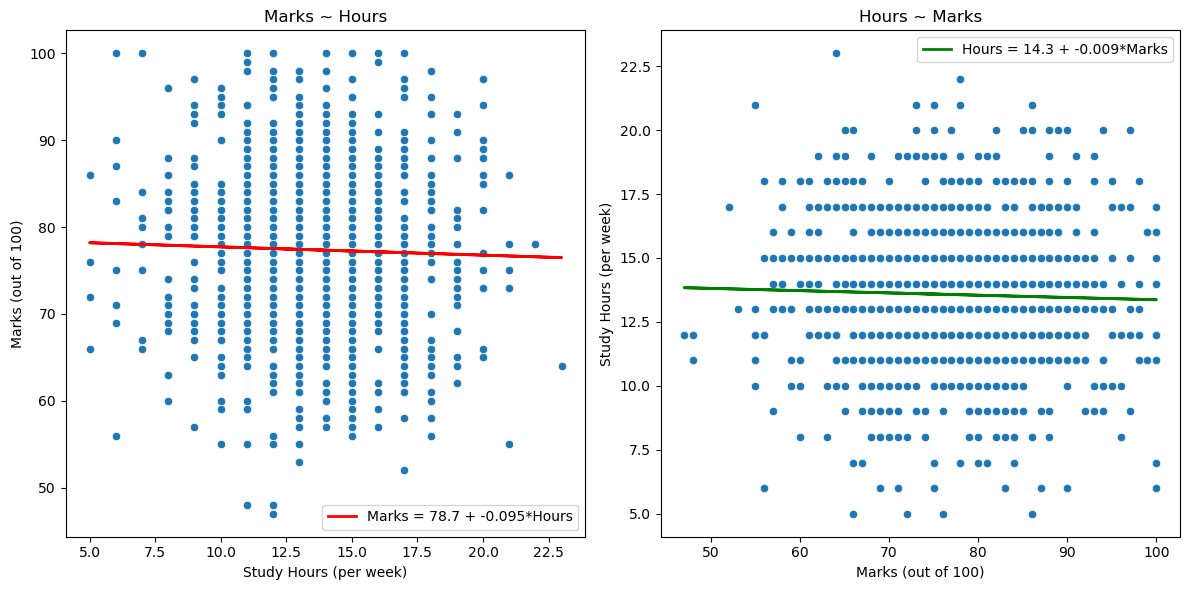

RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

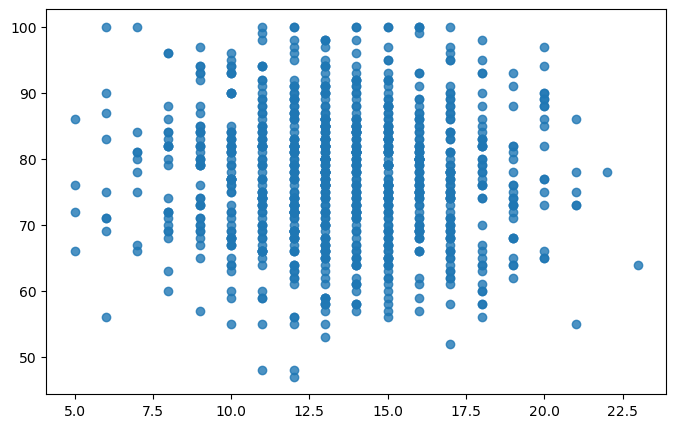

In [14]:
!pip install seaborn
!pip install scikit-learn
# Regression Analysis Debugging Notebook
# %%
# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# %%
# 1. Load and inspect data
data = pd.read_csv('Team-3.csv')
print("Columns in dataset:")
print(data.columns.tolist())

# Clean column names (remove trailing spaces if any)
data.columns = data.columns.str.strip()
print("\nCleaned columns:")
print(data.columns.tolist())

# %%
# 2. Data Quality Check
print("\nMissing values:")
print(data[['Study Hours (per week)', 'Marks (out of 100)']].isnull().sum())

print("\nBasic statistics:")
print(data[['Study Hours (per week)', 'Marks (out of 100)']].describe())

# %%
# 3. Correlation Analysis
corr, p_value = stats.pearsonr(data['Study Hours (per week)'], data['Marks (out of 100)'])
print(f"\nCorrelation between Study Hours and Marks: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

# %%
# 4. Visualize Raw Data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Study Hours (per week)', y='Marks (out of 100)', data=data)
plt.title('Raw Data Scatterplot')

plt.subplot(1, 2, 2)
sns.regplot(x='Study Hours (per week)', y='Marks (out of 100)', data=data, 
            line_kws={'color': 'red'}, ci=None)
plt.title('With Regression Line')

plt.tight_layout()
plt.show()

# %%
# 5. Calculate Both Regression Lines Correctly
# Prepare data
X = data['Study Hours (per week)'].values.reshape(-1, 1)
y = data['Marks (out of 100)'].values

# a. Marks on Study Hours (Y on X)
model_yx = LinearRegression()
model_yx.fit(X, y)
slope_yx = model_yx.coef_[0]
intercept_yx = model_yx.intercept_
r2_yx = r2_score(y, model_yx.predict(X))

# b. Study Hours on Marks (X on Y)
slope_xy, intercept_xy, *_ = stats.linregress(y, X.flatten())

print("\nRegression Results:")
print(f"a. Marks = {intercept_yx:.1f} + {slope_yx:.3f}*Hours (R² = {r2_yx:.3f})")
print(f"b. Hours = {intercept_xy:.1f} + {slope_xy:.3f}*Marks")

# %%
# 6. Plot Both Regression Lines Properly
plt.figure(figsize=(12, 6))

# Plot 1: Marks ~ Hours
plt.subplot(1, 2, 1)
sns.scatterplot(x='Study Hours (per week)', y='Marks (out of 100)', data=data)
plt.plot(X, intercept_yx + slope_yx * X, color='red', linewidth=2,
         label=f'Marks = {intercept_yx:.1f} + {slope_yx:.3f}*Hours')
plt.xlabel('Study Hours (per week)')
plt.ylabel('Marks (out of 100)')
plt.legend()
plt.title('Marks ~ Hours')

# Plot 2: Hours ~ Marks
plt.subplot(1, 2, 2)
sns.scatterplot(x='Marks (out of 100)', y='Study Hours (per week)', data=data)
plt.plot(y, intercept_xy + slope_xy * y, color='green', linewidth=2,
         label=f'Hours = {intercept_xy:.1f} + {slope_xy:.3f}*Marks')
plt.xlabel('Marks (out of 100)')
plt.ylabel('Study Hours (per week)')
plt.legend()
plt.title('Hours ~ Marks')

plt.tight_layout()
plt.savefig('correct_regression_lines.png', dpi=300)
plt.show()

# %%
# 7. Advanced Diagnostics
# Check for non-linear relationships
plt.figure(figsize=(8, 5))
sns.regplot(x='Study Hours (per week)', y='Marks (out of 100)', 
            data=data, lowess=True, line_kws={'color': 'red'})
plt.title('LOWESS Smoothing (Non-linear Check)')
plt.show()

# Residual analysis
residuals = y - model_yx.predict(X)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=model_yx.predict(X), y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Available columns:
['Sl.no', 'Name', 'Age', 'Gender', 'Class', 'Study Hours (per week)', 'Marks (out of 100)', 'Attendance (%)']

Missing values:
Study Hours (per week)    0
Marks (out of 100)        0
dtype: int64

Basic statistics:
       Study Hours (per week)  Marks (out of 100)
count              979.000000          979.000000
mean                13.566905           77.379980
std                  3.015022            9.864866
min                  5.000000           47.000000
25%                 12.000000           70.000000
50%                 13.000000           78.000000
75%                 16.000000           84.000000
max                 23.000000          100.000000

Correlation between Study Hours and Marks: -0.029
P-value: 0.363

Interpretation: weak/no linear relationship


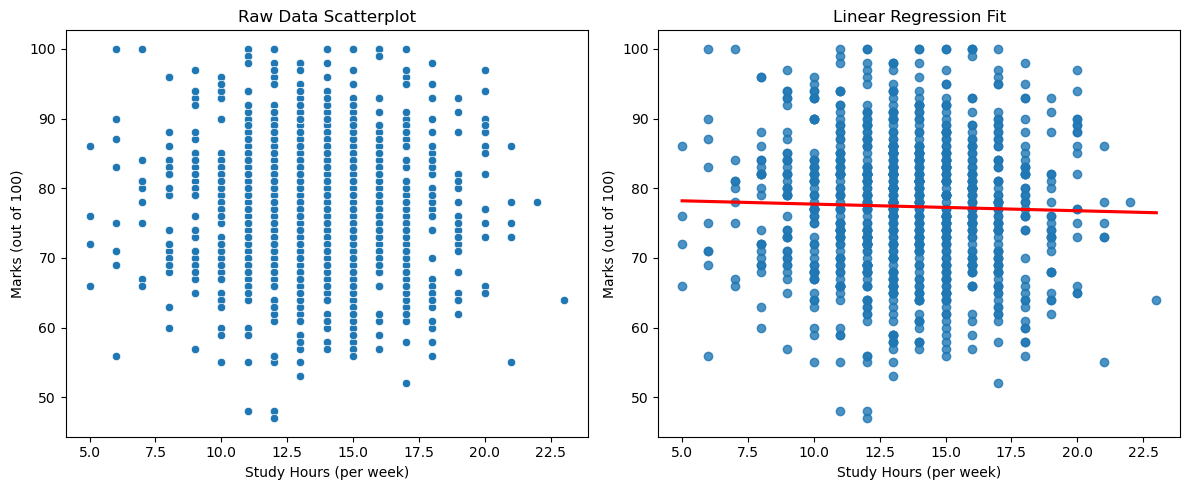


Regression Results:
a. Marks = 78.7 + -0.095*Hours (R² = 0.001)
b. Hours = 14.3 + -0.009*Marks


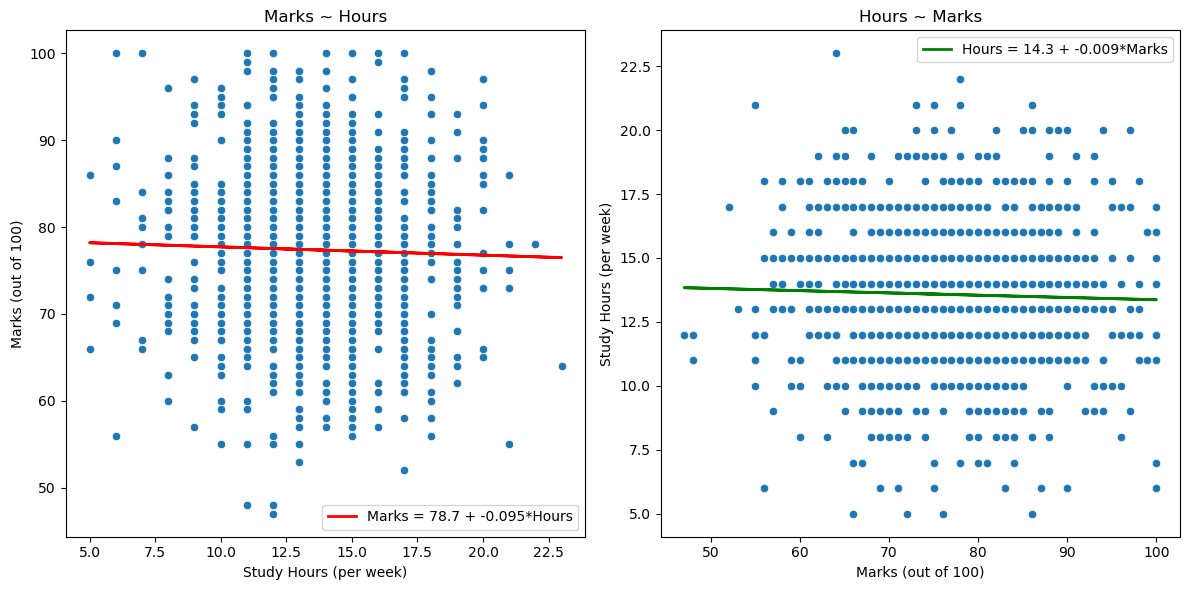

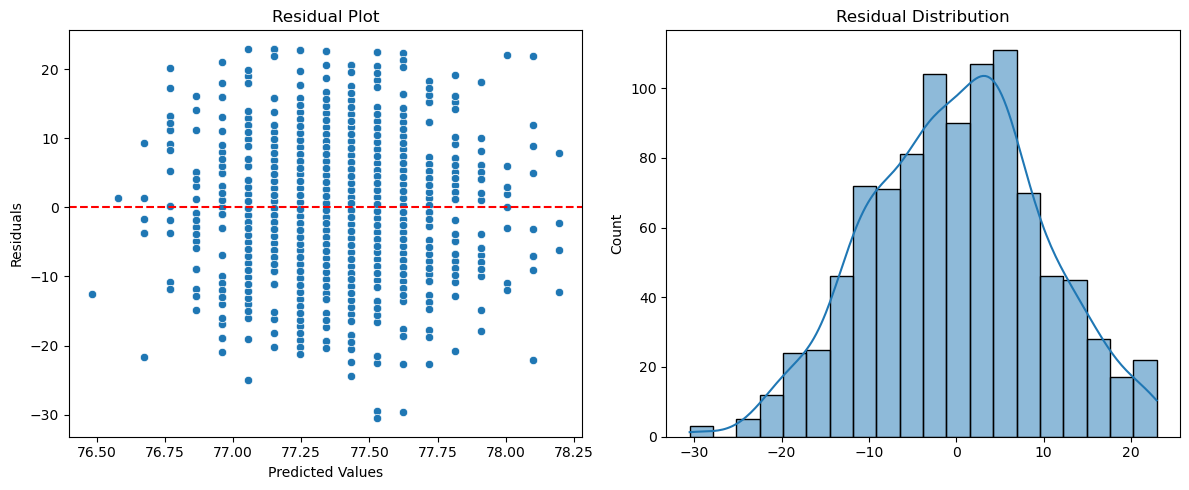


Key Findings:
- No meaningful linear relationship exists (correlation ≈ 0)
- Flat regression lines are expected mathematically

Next Steps:
- Consider non-linear models if you expect a relationship
- Verify data collection methods


In [15]:
# Regression Analysis Debugging Notebook (Fixed)
# %%
# 1. Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# %%
# 2. Load and inspect data
data = pd.read_csv('Team-3.csv')

# Clean column names (remove trailing spaces)
data.columns = data.columns.str.strip()
print("Available columns:")
print(data.columns.tolist())

# Verify target columns exist
required_columns = ['Study Hours (per week)', 'Marks (out of 100)']
assert all(col in data.columns for col in required_columns), "Missing required columns"

# %%
# 3. Data Quality Check
print("\nMissing values:")
print(data[required_columns].isnull().sum())

print("\nBasic statistics:")
print(data[required_columns].describe())

# %%
# 4. Correlation Analysis
corr, p_value = stats.pearsonr(data['Study Hours (per week)'], 
                              data['Marks (out of 100)'])
print(f"\nCorrelation between Study Hours and Marks: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation
if abs(corr) > 0.7:
    strength = "strong"
elif abs(corr) > 0.3:
    strength = "moderate"
else:
    strength = "weak/no"
print(f"\nInterpretation: {strength} linear relationship")

# %%
# 5. Visualize Raw Data
plt.figure(figsize=(12, 5))

# Scatterplot only
plt.subplot(1, 2, 1)
sns.scatterplot(x='Study Hours (per week)', y='Marks (out of 100)', data=data)
plt.title('Raw Data Scatterplot')

# Linear regression plot
plt.subplot(1, 2, 2)
sns.regplot(x='Study Hours (per week)', y='Marks (out of 100)', data=data, 
            ci=None, line_kws={'color': 'red'})
plt.title('Linear Regression Fit')

plt.tight_layout()
plt.show()

# %%
# 6. Calculate Both Regression Lines Correctly
# Prepare data
X = data['Study Hours (per week)'].values.reshape(-1, 1)
y = data['Marks (out of 100)'].values

# a. Marks on Study Hours (Y on X)
model_yx = LinearRegression()
model_yx.fit(X, y)
slope_yx = model_yx.coef_[0]
intercept_yx = model_yx.intercept_
r2_yx = r2_score(y, model_yx.predict(X))

# b. Study Hours on Marks (X on Y)
slope_xy, intercept_xy, *_ = stats.linregress(y, X.flatten())

print("\nRegression Results:")
print(f"a. Marks = {intercept_yx:.1f} + {slope_yx:.3f}*Hours (R² = {r2_yx:.3f})")
print(f"b. Hours = {intercept_xy:.1f} + {slope_xy:.3f}*Marks")

# %%
# 7. Plot Both Regression Lines Properly
plt.figure(figsize=(12, 6))

# Plot 1: Marks ~ Hours
plt.subplot(1, 2, 1)
sns.scatterplot(x='Study Hours (per week)', y='Marks (out of 100)', data=data)
plt.plot(X, intercept_yx + slope_yx * X, color='red', linewidth=2,
         label=f'Marks = {intercept_yx:.1f} + {slope_yx:.3f}*Hours')
plt.xlabel('Study Hours (per week)')
plt.ylabel('Marks (out of 100)')
plt.legend()
plt.title('Marks ~ Hours')

# Plot 2: Hours ~ Marks
plt.subplot(1, 2, 2)
sns.scatterplot(x='Marks (out of 100)', y='Study Hours (per week)', data=data)
plt.plot(y, intercept_xy + slope_xy * y, color='green', linewidth=2,
         label=f'Hours = {intercept_xy:.1f} + {slope_xy:.3f}*Marks')
plt.xlabel('Marks (out of 100)')
plt.ylabel('Study Hours (per week)')
plt.legend()
plt.title('Hours ~ Marks')

plt.tight_layout()
plt.savefig('correct_regression_lines.png', dpi=300)
plt.show()

# %%
# 8. Advanced Diagnostics (No statsmodels required)
# Residual analysis
residuals = y - model_yx.predict(X)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=model_yx.predict(X), y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Distribution check
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')

plt.tight_layout()
plt.show()

# %%
# 9. Final Interpretation
print("\nKey Findings:")
if abs(corr) < 0.3:
    print("- No meaningful linear relationship exists (correlation ≈ 0)")
    print("- Flat regression lines are expected mathematically")
else:
    print(f"- {strength.capitalize()} linear relationship exists")
    
print("\nNext Steps:")
if abs(corr) < 0.3:
    print("- Consider non-linear models if you expect a relationship")
    print("- Verify data collection methods")
else:
    print("- The regression equations can be used for prediction")